In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  transforms
import seaborn as sns
%matplotlib inline
plt.style.use('default')

cutoff_per = 0.03

names  = !ls all_re_filtered_lensort_OTU_id*.uc
names = names[2:] + ["all_re_filtered_lensort_OTU_id100.uc"]
names

['all_re_filtered_lensort_OTU_id91.uc',
 'all_re_filtered_lensort_OTU_id92.uc',
 'all_re_filtered_lensort_OTU_id93.uc',
 'all_re_filtered_lensort_OTU_id94.uc',
 'all_re_filtered_lensort_OTU_id95.uc',
 'all_re_filtered_lensort_OTU_id96.uc',
 'all_re_filtered_lensort_OTU_id97.uc',
 'all_re_filtered_lensort_OTU_id98.uc',
 'all_re_filtered_lensort_OTU_id99.uc',
 'all_re_filtered_lensort_OTU_id100.uc']

In [379]:
!cat all_re_filtered_lensort_OTU_id91.uc | grep OTU_46

H	45	1250	100.0	+	0	0	1250M	Test4-AMFmix-2018_5_878_l1250	OTU_46


# #Function: get OTU count table

In [385]:
def incorfiles(pwd):
    df = pd.read_csv(pwd,header=None,sep="\t")
    df1 = df[df[0]=="H"]
    dft = pd.DataFrame(df1.groupby(9).size())
    dft3 = dft[dft[0] > 2] ##only show OTU with > 2 mapped reads
    dft3[0] = 1
    dft3 = dft3.reset_index()
    df2 = df1.iloc[:,-2:]
    df2[8] = ["_".join(a[0:2]) for a in list(df2[8].str.split("_"))]
    df2[10] = 1
    df3 = pd.DataFrame(df2.groupby([8,9])[10].sum())
    df3 = df3.reset_index()
    dfx = pd.merge(df3,dft3,left_on=9,right_on=9,how="left")
    dfy = dfx[dfx[0] > 0]
    dfy.columns = ["sample ID","OTU ID","count","sth"]
    dfy = dfy.iloc[:,:3]
    dftb = pd.pivot_table(dfy,index="OTU ID",columns="sample ID",values="count")
    return dftb
incorfiles(names[0])


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


sample ID,Test4-AMFmix-2018_1,Test4-AMFmix-2018_10,Test4-AMFmix-2018_11,Test4-AMFmix-2018_12,Test4-AMFmix-2018_13,Test4-AMFmix-2018_2,Test4-AMFmix-2018_4,Test4-AMFmix-2018_5,Test4-AMFmix-2018_6,Test4-AMFmix-2018_7,Test4-AMFmix-2018_8,Test4-AMFmix-2018_9
OTU ID,,,,,,,,,,,,
OTU_1,NaN,NaN,57.0,NaN,3.0,NaN,NaN,NaN,706.0,NaN,NaN,246.0
OTU_10,NaN,52.0,26.0,32.0,138.0,NaN,NaN,NaN,9.0,14.0,8.0,112.0
OTU_11,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0
OTU_12,NaN,233.0,31.0,22.0,29.0,NaN,NaN,NaN,8.0,43.0,37.0,182.0
OTU_13,NaN,60.0,8.0,63.0,22.0,NaN,1.0,NaN,2.0,39.0,15.0,5.0
OTU_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,3.0
OTU_15,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
OTU_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
OTU_17,NaN,41.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0


# #Function:get % tabble

In [386]:
def get_per_tb(pwd):
    df = incorfiles(pwd).T
    #df['sort_1'] = [a[0] for a in df.index.str.split("OTU")]
    df['sort_1'] = [a[1] for a in df.index.str.split("_")]
    df = df.astype(float)
    df = df.sort_values(["sort_1"])
    df = df.iloc[:,:-1].T
    df['sort'] = [a[1] for a in df.index.str.split("_")]
    df = df.astype(float)
    df = df.sort_values(["sort"])
    df = df.iloc[:,:-1]
    df_per = df/df.sum()
    return df_per
get_per_tb(names[0])


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


sample ID,Test4-AMFmix-2018_1,Test4-AMFmix-2018_2,Test4-AMFmix-2018_4,Test4-AMFmix-2018_5,Test4-AMFmix-2018_6,Test4-AMFmix-2018_7,Test4-AMFmix-2018_8,Test4-AMFmix-2018_9,Test4-AMFmix-2018_10,Test4-AMFmix-2018_11,Test4-AMFmix-2018_12,Test4-AMFmix-2018_13
OTU ID,,,,,,,,,,,,
OTU_1,NaN,NaN,NaN,NaN,0.628114,NaN,NaN,0.239766,NaN,0.094059,NaN,0.003916
OTU_2,0.459528,0.659452,0.420908,0.666267,0.000890,0.008418,0.009346,NaN,0.000992,0.117162,0.285294,0.379896
OTU_3,NaN,NaN,NaN,NaN,0.159253,NaN,NaN,0.027290,NaN,0.001650,NaN,NaN
OTU_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051657,0.125000,0.313531,0.229412,0.113577
OTU_5,NaN,NaN,NaN,NaN,0.021352,0.097643,0.098131,0.010721,0.055556,0.009901,0.011765,0.011749
OTU_6,0.443595,0.246032,0.308116,0.258238,NaN,NaN,NaN,0.000975,NaN,0.008251,0.001471,NaN
OTU_7,NaN,0.000722,NaN,NaN,0.005338,0.048822,0.032710,0.024366,0.053571,0.001650,0.005882,0.005222
OTU_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049708,NaN,0.011551,NaN,NaN
OTU_9,0.083493,0.085859,0.265475,0.073697,0.000890,0.011785,0.004673,0.036062,0.303571,0.092409,0.267647,0.207572


# #Function:get taxon columns

In [387]:
def tax_genus(pwd):
    tax1 = pd.read_csv(pwd,header=None,sep="\t",index_col=0)
    tax1 = pd.DataFrame(tax1.loc[:,1])
    tax1 = tax1[1].str.split(",",expand=True)
    for i in list(tax1.columns):
        tax1[i] = tax1[i].replace(".+unidentified.+",np.nan,regex=True)
    #tax1[tax1[5] == "None"]
    #tax1[tax1[5].isnull()]
    tax1["taxon"] = ""
    for i in tax1.columns[:-2]:
        add_tax = ~tax1.iloc[:,i].isnull()
        tax1.iloc[:,-1][add_tax] = tax1[add_tax].iloc[:,i]
        tax2 = pd.DataFrame(tax1.iloc[:,-1].str.split("(",expand=True)[0])
        tax2.columns = ["taxon"]
    return tax2
tax_genus("all_re_filtered_lensort_OTU_id91_sintax_rm.txt")

,taxon
0,
OTU_8,c:Sordariomycetes
OTU_6,g:Diversispora
OTU_9,g:Gigaspora
OTU_4,p:Glomeromycota
OTU_5,g:Rhizophagus
OTU_10,g:Paraglomus
OTU_3,f:Halosphaeriaceae
OTU_1,g:Serendipita
OTU_2,g:Rhizophagus


# #Function:get per and taxon table

In [411]:
def get_per_taxon_tb(eachTestID):
    tax = tax_genus(eachTestID.replace(".uc","_sintax_rm.txt"))
    tax.columns = ["taxon_unite"]
    tax_rm_Ug = tax_genus(eachTestID.replace(".uc","_sintax_rm_unidentifiedG.txt"))
    tax_rm_Ug.columns = ["taxon_unite_rmUg"]
    df_per = pd.merge(get_per_tb(eachTestID),tax,left_index=True,right_index=True,how="left")
    df_per = pd.merge(df_per,tax_rm_Ug,left_index=True,right_index=True,how="left")
    #try:
        #del df_per["2nd_1"]
    #except Exception:
        #pass
    #try:
        #del df_per["2nd_14"]
    #except Exception:
        #pass
    
    #df_per.columns = col
    df_per["taxon_unite_rmUg"] = df_per["taxon_unite_rmUg"].str.replace("g:Claroideoglomus","Gc").str.replace("g:Rhizophagus","Ri").str.replace("g:Diversispora","Gv").str.replace("g:Gigaspora","Gigi") #simplify the taxon to Gv, Gigi, Ri and Gc

    return df_per

df_per = get_per_taxon_tb(names[7])
df_per.iloc[:,:-2] = df_per.iloc[:,:-2][df_per.iloc[:,:-2] > 0.01]
df_per = df_per[~df_per.iloc[:,:-2].isnull().all(1)]
len(df_per.groupby("taxon_unite_rmUg").size())


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


13

# #Function: plot_known_samples

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


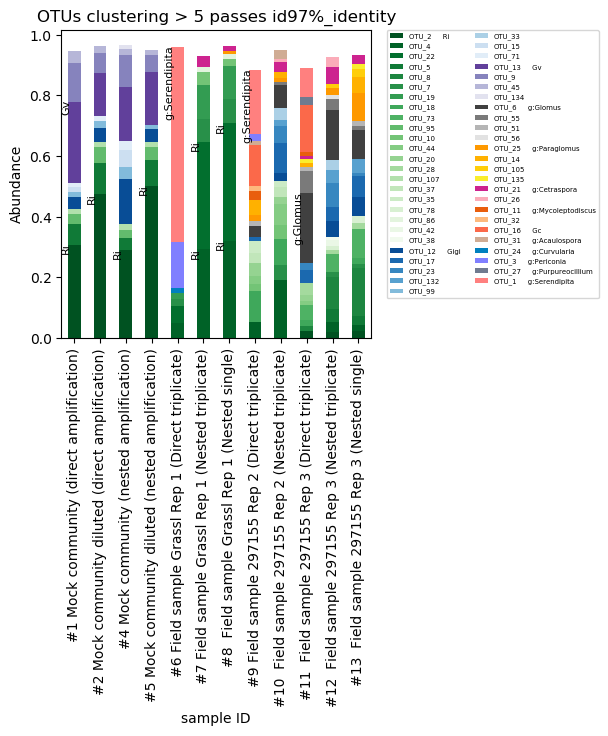

In [417]:
col_known = ["#1 Mock community (direct amplification)",
    "#2 Mock community diluted (direct amplification)",
    "#4 Mock community (nested amplification)",
    "#5 Mock community diluted (nested amplification)",
    "#6 Field sample Grassl Rep 1 (Direct triplicate)",
    "#7 Field sample Grassl Rep 1 (Nested triplicate)",
    "#8  Field sample Grassl Rep 1 (Nested single)",
    "#9 Field sample 297155 Rep 2 (Direct triplicate)",
    "#10  Field sample 297155 Rep 2 (Nested triplicate)",
    "#11  Field sample 297155 Rep 3 (Direct triplicate)",
    "#12  Field sample 297155 Rep 3 (Nested triplicate)",
    "#13  Field sample 297155 Rep 3 (Nested single)",
    "taxon_unite","taxon_unite_rmUg"]
##ncol legend col
def plot_known_samples(eachTestID,ncol):
    df = get_per_taxon_tb(eachTestID)
    df.columns = col_known
    df = df.sort_values(["taxon_unite_rmUg","taxon_unite"]) ## sort using taxon
    ## remove < 1%
    df.iloc[:,:-2] = df.iloc[:,:-2][df.iloc[:,:-2] > 0.01]
    df = df[~df.iloc[:,:-2].isnull().all(1)]
    
    df["sort_per"] = df.iloc[:,:-2].sum(1)
    dfcount = df.groupby("taxon_unite_rmUg").size()
    dfcount = pd.DataFrame(dfcount)
    dfcount.columns = ["genus_count"]
    df = pd.merge(df,dfcount,left_on="taxon_unite_rmUg",right_index=True,how="left")
    df = df.sort_values(["genus_count","taxon_unite_rmUg","sort_per"],ascending=[False, True,False])
    df =df.iloc[:,:-2]
    ## each genus have a unqiue main color
    len(df["taxon_unite_rmUg"].unique())
    color_list = ["Greens","Blues","Purples","Greys","Wistia","RdPu","Oranges","Reds","pink","winter","cool","bone","spring","copper"] ## main color
    genus = df["taxon_unite_rmUg"].unique()
    
    ## set gradient color for each genus
    df["color"] = "" ## generate one column for color
    for i in np.arange(len(genus)):
        dft = df[df["taxon_unite_rmUg"] == genus[i]]
        mycolor = sns.color_palette(color_list[i], len(dft["taxon_unite_rmUg"])).as_hex()
        df.loc[df["taxon_unite_rmUg"] == genus[i],"color"] = list(reversed(mycolor))    
    
    
    ## change index to fit plt legend
    topind = df.drop_duplicates(subset='taxon_unite_rmUg').index
    topind_num = list(df.reset_index().drop_duplicates(subset='taxon_unite_rmUg').index)
    #df.loc[topind].index = df.loc[topind].index +"\t"+ df.loc[topind,"taxon_unite_rmUg"] 
    dft = df.reset_index()
    dft.loc[topind_num,"OTU ID"] = df.loc[topind].index +"     "+ df.loc[topind,"taxon_unite_rmUg"]
    df = dft.set_index("OTU ID")
    
    
    df.iloc[:,:-3].T.plot(kind='bar', stacked=True,colors=df["color"],figsize=(4,4))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 5},ncol=ncol)
    plt.xticks(rotation=90)
    plt.xlabel('sample ID')
    plt.ylabel('Abundance')
    #plt.plot( [4.5,4.5],[0,1.02],linestyle='-',color='k')
    #plt.text(4.8, 1.01, "2nd PacBio run") 
    #plt.text(1, 1.01, "1st PacBio run") 
    for j in np.arange(0,12):
        dft = df.iloc[:,[j,-2]].dropna()
        a = list(dft.iloc[:,0])
        b =[]
        dft1 = dft.copy()
        for i in np.arange(1,len(a)+1):
            b.append(sum(a[:i]))
        dft1.iloc[:,0] = b
        #dft.set_index('taxon_rm_UG')
        ind = list(dft[dft.iloc[:,0] > 0.2].index)
        dft2 = dft1.loc[ind,:]
        for y, label in zip(list(dft2.iloc[:,0]),list(dft2.iloc[:,1])):
            plt.text(j-0.5, y-0.02, label,fontsize=8,rotation='vertical')
    plt.title("OTUs clustering > 5 passes " + eachTestID.replace(".uc","%_identity").replace("all_re_filtered_lensort_OTU_",""))
    transforms.Affine2D().rotate_deg(90)
    plt.savefig(eachTestID.replace("all_re_filtered_lensort_OTU_","usearch_clustering_").replace(".uc","") + "_plot.png", bbox_inches='tight')
    return plt.show()
plot_known_samples(names[6],2)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


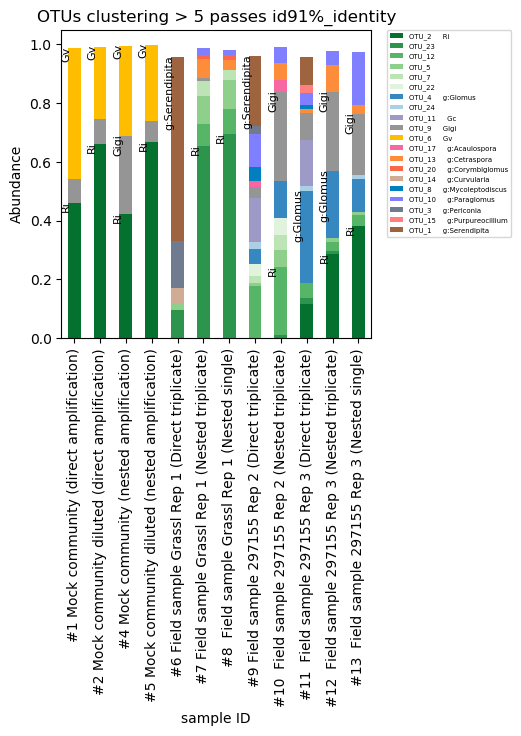

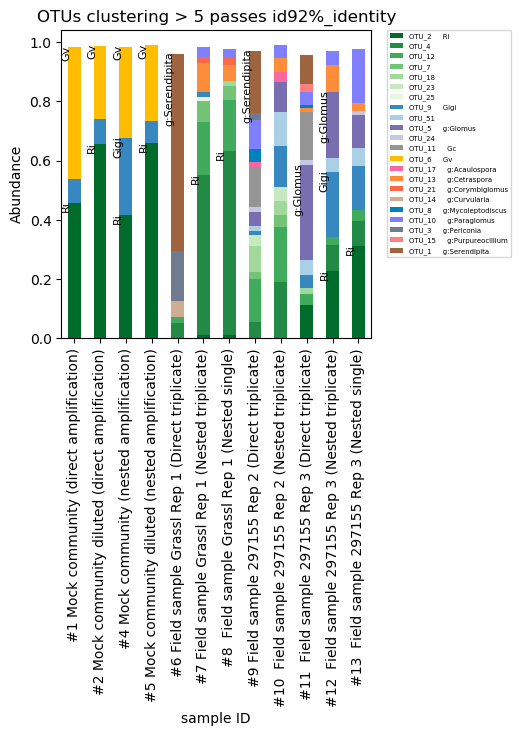

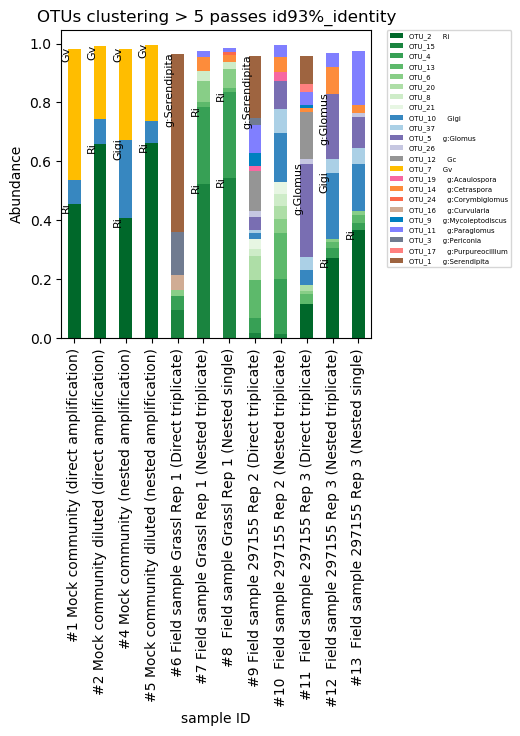

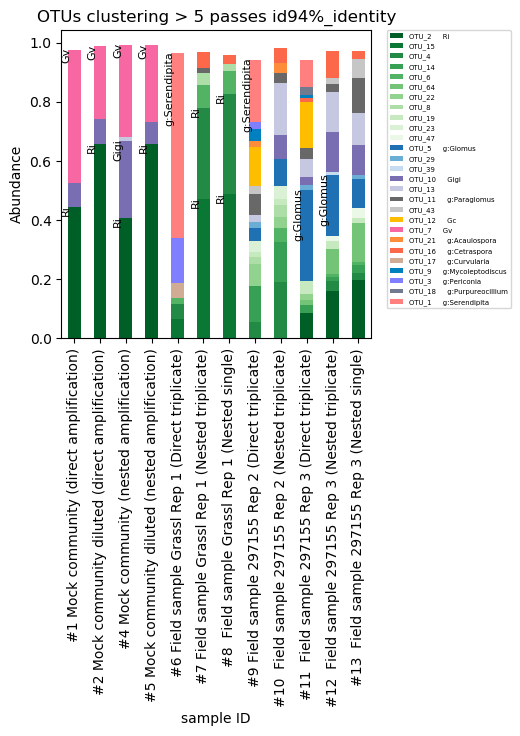

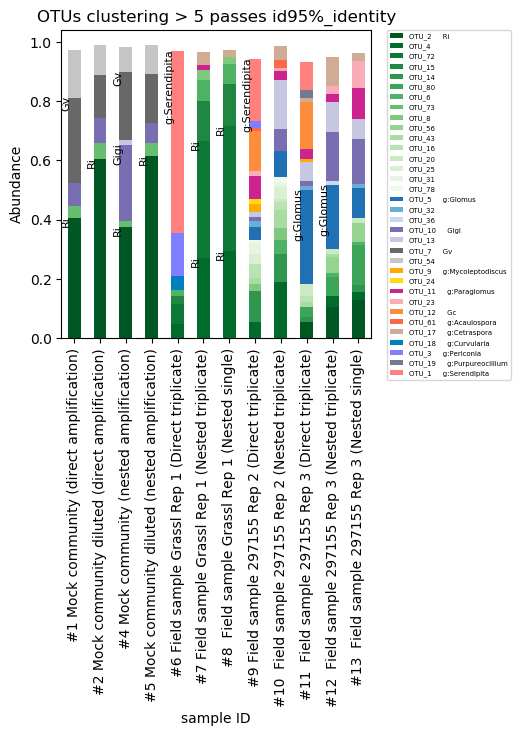

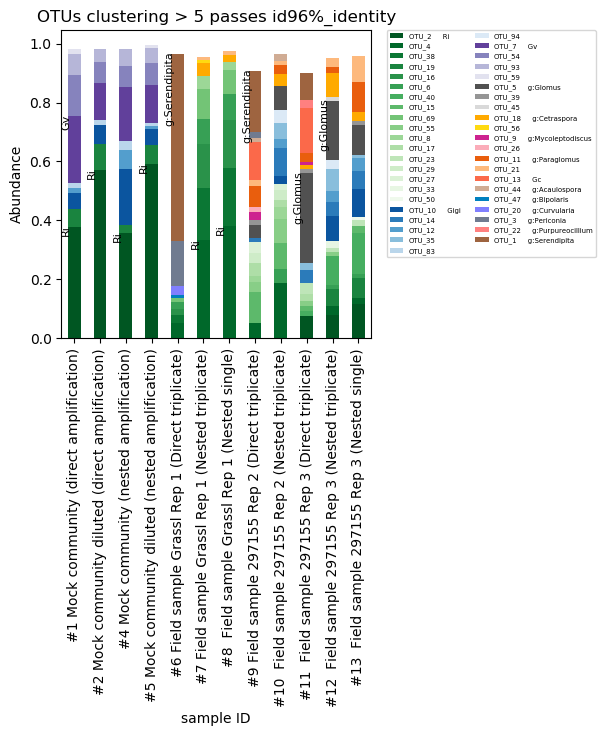

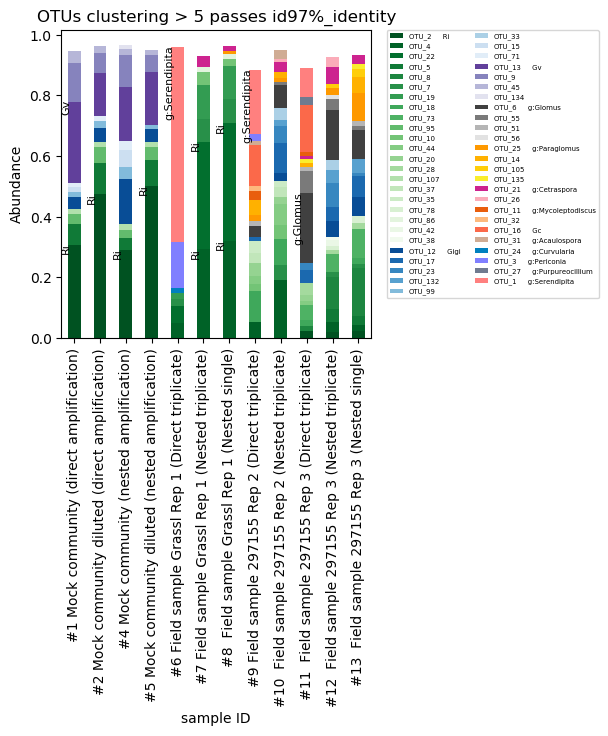

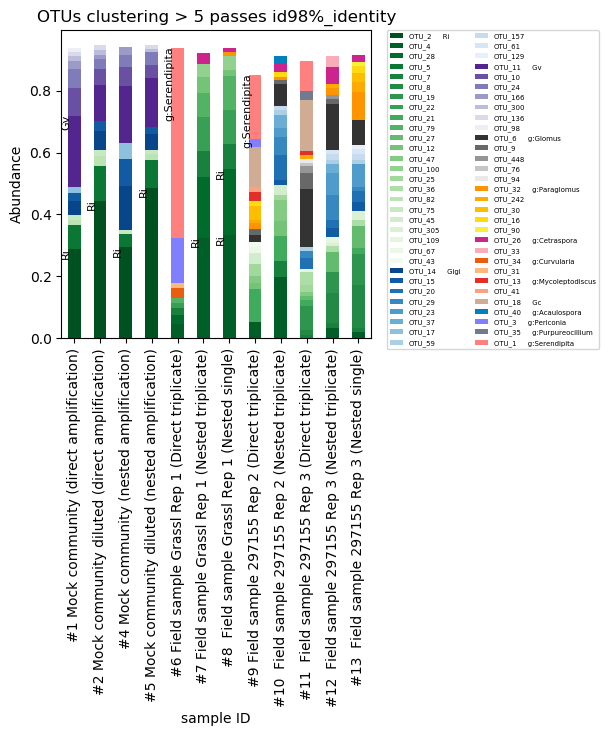

In [415]:
plot_known_samples(names[0],1)
plot_known_samples(names[1],1)
plot_known_samples(names[2],1)
plot_known_samples(names[3],1)
plot_known_samples(names[4],1)
plot_known_samples(names[5],2)
plot_known_samples(names[6],2)
plot_known_samples(names[7],2)